In [1]:
import numpy as np #berfungsi untuk memanggil atau memasukkan library numpy yang diinisialisasikan dengan np
import matplotlib.pyplot as plt #berfungsi untuk memanggil atau memasukkan library matplotlib.pyplot yang diinisialisasikan dengan plt
import cv2 as cv #berfungsi untuk memanggil atau memasukkan library cv2 yang diinisialisasikan dengan cv

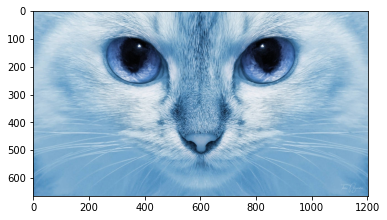

In [2]:
img = plt.imread("kocheng.jpg") #berfungsi untuk menampilkan kocheng.jpg
plt.imshow(img)

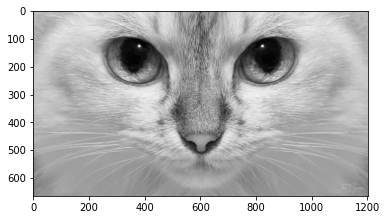

In [3]:
gray_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY) #berfungsi untuk merubah warna gambar menjadi gray atau abu-abu
plt.imshow(gray_img, cmap='gray')

In [4]:
r, c = gray_img.shape #membuat matriks sesuai dengan bentuk gambar
#membuat variabel yang menampung hasil downsampling
r2 = int(r/2)
c2 = int(c/2)

kLow = np.array([0.7071067811865476, 0.7071067811865476]) #nilai kernel dekomposisi haar untuk low pass filter
kHigh = np.array([-0.7071067811865476, 0.7071067811865476]) #nilai kernel dekomposisi haar untuk high pass filter
kHigh2 = np.array([0.7071067811865476, -0.7071067811865476])

In [5]:
def padding(img, n):
    hasil = np.pad(img, (0, n), 'constant')
    
    return hasil

Sript di atas adalah sebuah fungsi untuk menambah padding ke proses down sampling pada low pass filter atau high pass filter

In [6]:
def konv(img, kernel, step):
    if step == 1:
        hasil = np.zeros((r, c)) #pembuatan matriks yang akan menampung hasil konvolusi pada kolom
        for x in range(r):
            for y in range(c):
                for z in range(len(kernel)):
                    hasil[x, y] += (kernel[z]*img[x, y+z]) #proses penghitungan konvolusi pada kolom
    else:
        hasil = np.zeros((r, c2)) #pembuatan matriks yang akan menampung hasil konvolusi pada baris
        for x in range(r):
            for y in range(c2):
                for z in range(len(kernel)):
                    hasil[x, y] += (kernel[z]*img[z+x, y]) #proses penghitungan konvolusi pada baris
                    
    return hasil #mengembalikan nilai hasil

Script di atas adalah fungsi yang digunakan untuk mengkonvolusi citra.

In [7]:
def downSamp(img, step):
    if step == 1:
        hasil = np.zeros((r, c)) #pembuatan matriks yang akan menampung hasil proses downsampling pada kolom
        for x in range(r):
            for y in range (c2):
                hasil[x, y] = img[x, y*2] #menghitung downsampling pada kolom
    else:
        hasil = np.zeros((r2, c2)) #pembuatan matriks yang akan menampung hasil proses downsampling pada baris
        for x in range(r2):
            for y in range (c2):
                hasil[x, y] = img[x*2, y] #menghitung downsampling pada baris

    return hasil

Script di atas adalah fungsi yang digunakan untuk melakukan proses down sampling pada citra.

In [8]:
def transpose(kernel):
    hasil = np.zeros((len(kernel), 1)) #pembuatan matriks yang akan menampung hasil transpose
    for x in range(len(kernel)):
        for y in range(1):
            hasil[x, y] = kernel[x] #transformasi citra
    
    return hasil

Script di atas adalah fungsi yang digunakan untuk melakukan proses tranpose pada citra.

LL (APPROXIMATION)

In [9]:
pad=padding(gray_img, 1)
kv0=konv(pad, kLow, 1)
pad_bw=downSamp(kv0, 1)
hasilT=transpose(kLow)
pad2=padding(pad_bw, 1)
data=konv(pad2, hasilT, 2)
LL=downSamp(data, 2)
print(LL)

[[352.  351.  359.5 ... 357.  349.5 355. ]
 [357.  359.5 365.5 ... 365.5 357.5 356. ]
 [361.  369.5 371.  ... 375.5 367.5 360. ]
 ...
 [256.  256.5 261.  ... 267.5 263.5 264. ]
 [256.  257.  264.  ... 269.  265.5 264. ]
 [255.  258.  266.  ... 270.5 266.5 264. ]]


Script di atas berfungsi melakukan representasi aproksimasi citra dengan melakukan pemanggilan fungsi padding, konv, downSamp dan transpose yang telah dibuat sebelumnya. Terjadi dua proses konvolusi di mana keduanya menggunakan low pass filter.

HL (VERTICAL DETAIL)

In [10]:
kv0=konv(pad, kHigh, 1)
pad_bw=downSamp(kv0, 1)
hasilT=transpose(kLow)
pad2=padding(pad_bw, 1)
data=konv(pad2, hasilT, 2)
HL=downSamp(data, 2)
print(HL)

[[-2.00000000e+00  2.00000000e+00  5.00000000e-01 ...  0.00000000e+00
  -2.50000000e+00  0.00000000e+00]
 [-1.01030295e-14  1.50000000e+00  5.00000000e-01 ... -5.00000000e-01
  -2.50000000e+00  0.00000000e+00]
 [ 2.00000000e+00  1.50000000e+00  0.00000000e+00 ... -5.00000000e-01
  -2.50000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  5.00000000e-01  2.00000000e+00 ... -1.50000000e+00
  -5.00000000e-01  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  2.00000000e+00 ... -1.00000000e+00
  -5.00000000e-01  0.00000000e+00]
 [ 1.00000000e+00  2.00000000e+00  2.00000000e+00 ... -1.50000000e+00
  -5.00000000e-01  0.00000000e+00]]


Script di atas berfungsi untuk menampilkan detail vertikal citra dengan melakukan pemanggilan fungsi konv, downSamp, transpose, dan padding yang telah dibuat sebelumnya. Terjadi dua proses konvolusi di mana konvolusi pertama menggunakan high pass filter dan konvolusi kedua menggunakan low pass filter.

LH (HORIZONTAL DETAIL)

In [11]:
kv0=konv(pad, kLow, 1)
pad_bw=downSamp(kv0, 1)
hasilT=transpose(kHigh)
pad2=padding(pad_bw, 1)
data=konv(pad2, hasilT, 2)
LH=downSamp(data, 2)
print(LH)

[[ 0.   1.   0.5 ...  1.   0.5 -1. ]
 [ 2.   3.5  2.5 ...  3.5  3.5  2. ]
 [-1.   0.5 -1.  ...  0.5  0.5  0. ]
 ...
 [ 0.   0.5  1.  ...  0.5  0.5  0. ]
 [ 0.   0.   0.  ...  0.   0.5  0. ]
 [ 0.   0.   0.  ...  0.5  0.5  0. ]]


Script di atas berfungsi untuk menampilkan detail horizontal citra dengan melakukan pemanggilan fungsi konv, downSamp, transpose, dan padding yang telah dibuat sebelumnya. Terjadi dua proses konvolusi di mana konvolusi pertama menggunakan low pass filter dan konvolusi kedua menggunakan high pass filter.

HH (DIAGONAL DETAIL)

In [12]:
kv0=konv(pad, kHigh, 1)
pad_bw=downSamp(kv0, 1)
hasilT=transpose(kHigh)
pad2=padding(pad_bw, 1)
data=konv(pad2, hasilT, 2)
HH=downSamp(data, 2)
print(HH)

[[ 0.00000000e+00  0.00000000e+00 -5.00000000e-01 ...  0.00000000e+00
   5.00000000e-01  0.00000000e+00]
 [ 1.00000000e+00 -5.00000000e-01 -5.00000000e-01 ... -5.00000000e-01
  -5.00000000e-01  0.00000000e+00]
 [-1.01030295e-14  5.00000000e-01  0.00000000e+00 ...  5.00000000e-01
   5.00000000e-01  0.00000000e+00]
 ...
 [ 0.00000000e+00  5.00000000e-01  0.00000000e+00 ... -5.00000000e-01
   5.00000000e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   5.00000000e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  5.00000000e-01
  -5.00000000e-01  0.00000000e+00]]


Script di atas berfungsi untuk menampilkan detail diagonal citra dengan melakukan pemanggilan fungsi konv, downSamp, transpose, dan padding yang telah dibuat sebelumnya. Terjadi dua proses konvolusi di mana keduanya menggunakan high pass filter.

HASIL APPROXIMATION, VERTIKAL, HORIZONTAL DAN DIAGONAL DETAIL DARI CITRA

Text(0.5, 1.0, 'Diagonal Detail')

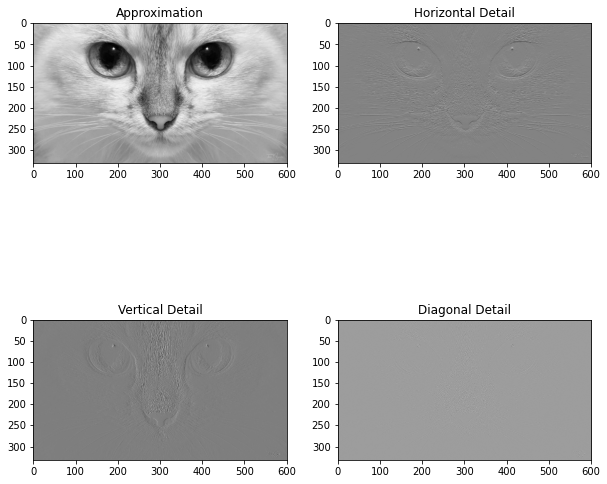

In [13]:
#menampilkan citra hasil dekomposisi dengan kernel dekomposisi haar
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

fig.add_subplot(2, 2, 1)
plt.imshow(LL, cmap='gray') #menampilkan representasi approximation detail
plt.title('Approximation')
fig.add_subplot(2, 2, 2)
plt.imshow(LH, cmap='gray') #menampilkan representasi horizontal detail
plt.title('Horizontal Detail')
fig.add_subplot(2, 2, 3)
plt.imshow(HL, cmap='gray') #menampilkan representasi vertical detail
plt.title('Vertical Detail')
fig.add_subplot(2, 2, 4)
plt.imshow(HH, cmap='gray') #menampilkan representasi diagonal detail
plt.title('Diagonal Detail')

In [14]:
def upSamp(img, step):
    if step == 1:
        hasil = np.zeros((r, c2)) #pembuatan matriks yang akan menampung hasil proses upsampling pada kolom
        for x in range(r2):
            for y in range (c2):
                hasil[x*2, y] = img[x, y] #menghitung upsampling pada kolom
    else:
        hasil = np.zeros((r, c)) #pembuatan matriks yang akan menampung hasil proses upsampling pada baris
        for x in range(r):
            for y in range(c2):
                hasil[x, y*2] = img[x, y] #menghitung upsampling pada baris

    return hasil

Script di atas adalah fungsi yang digunakan untuk melakukan proses up sampling pada citra.

Pengembalian Hasil Approximation (LL)

In [15]:
us = upSamp(LL, 1)
pad1 = padding(us, 1)
konvo1 = konv(pad1, kLow, 2)
us2 = upSamp(konvo1, 2)
pad2 = padding(us2, 1)
tkernel = transpose(kLow)
LL = konv(pad2, tkernel, 1)
print(LL)

[[176.   175.5  175.5  ... 177.5    0.     0.  ]
 [178.5  179.75 179.75 ... 178.     0.     0.  ]
 [178.5  179.75 179.75 ... 178.     0.     0.  ]
 ...
 [127.5  129.   129.   ... 132.     0.     0.  ]
 [127.5  129.   129.   ... 132.     0.     0.  ]
 [  0.     0.     0.   ...   0.     0.     0.  ]]


Script di atas berfungsi melakukan representasi aproksimasi citra sebelumnya kebentuk citra awal. Proses ini dilakukan dengan melakukan pemanggilan fungsi upSamp, padding, konv dan transpose yang telah dibuat sebelumnya. Terjadi dua proses konvolusi di mana keduanya menggunakan low pass filter.

Pengembalian Hasil Horizontal (LH)

In [16]:
us = upSamp(LH, 1)
pad1 = padding(us, 1)
konvo1 = konv(pad1, kHigh2, 2)
us2 = upSamp(konvo1, 2)
pad2 = padding(us2, 1)
tkernel = transpose(kLow)
LH = konv(pad2, tkernel, 1)
print(LH)

[[ 0.    0.5   0.5  ... -0.5   0.    0.  ]
 [-1.   -1.75 -1.75 ... -1.    0.    0.  ]
 [ 1.    1.75  1.75 ...  1.    0.    0.  ]
 ...
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]]


Script di atas berfungsi mengembalikan citra hasil pengambilan detail horizontal citra dengan melakukan pemanggilan fungsi konv, upSamp, transpose, dan padding yang telah dibuat sebelumnya. Terjadi dua proses konvolusi di mana konvolusi pertama menggunakan high pass filter kedua dan konvolusi kedua menggunakan low pass filter.

Pengembalian Hasil Vertical (HL)

In [17]:
us = upSamp(HL, 1)
pad1 = padding(us, 1)
konvo1 = konv(pad1, kLow, 2)
us2 = upSamp(konvo1, 2)
pad2 = padding(us2, 1)
tkernel = transpose(kHigh2)
HL = konv(pad2, tkernel, 1)
print(HL)

[[-1.00000000e+00 -1.00000000e+00  1.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-5.05151476e-15 -7.50000000e-01  7.50000000e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-5.05151476e-15 -7.50000000e-01  7.50000000e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 5.00000000e-01 -1.00000000e+00  1.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 5.00000000e-01 -1.00000000e+00  1.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


Script diatas berfungsi mengembalikan citra hasil pengambilan detail vertikal citra sebelumnya ke bentuk citra awal. Proses ini dilakukan dengan melakukan pemanggilan fungsi upSamp, padding, konv dan trans yang telah dibuat. Terjadi dua proses konvolusi dimana konvulasi pertama menggunakan low pass filter dan konvulasi kedua menggunakan high pass filter kedua.

Pengembalian Hasil Diagonal (HH)

In [18]:
us = upSamp(HH, 1)
pad1 = padding(us, 1)
konvo1 = konv(pad1, kHigh2, 2)
us2 = upSamp(konvo1, 2)
pad2 = padding(us2, 1)
tkernel = transpose(kHigh2)
HH = konv(pad2, tkernel, 1)
print(HH)

[[ 0.    0.    0.   ...  0.    0.    0.  ]
 [-0.5  -0.25  0.25 ...  0.    0.    0.  ]
 [ 0.5   0.25 -0.25 ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]]


Script diatas berfungsi mengembalikan citra hasil pengambilan detail diagonal citra sebelumnya ke bentuk citra awal. Proses ini dilakukan dengan melakukan pemanggilan fungsi upSamp, padding, konv dan trans yang telah dibuat. Terjadi dua proses konvolusi dimana keduanya menggunakan high pass filter kedua.

In [19]:
def add(img1, img2):
    hasil = np.zeros((r, c))
    for x in range(256):
        for y in range(256):
            hasil[x, y] = img1[x, y] + img2[x, y]
    return hasil

Script di atas adalah fungsi yang digunakan untuk menggabungkan dua buah citra.

In [20]:
hasil1 = add(LL, LH) #menyimpan hasil penjumlahan antara matriks LL dan LH
hasil2 = add(HL, HH) #menyimpan hasil penjumlahan antara matriks HL dan HH
hasilakhir = add(hasil1, hasil2) #menyimpan hasil penjumlahan matriks hasil1 dan hasil2 untuk mendapatkan gambar semula

In [22]:
hasilakhir = np.ravel(gray_img) #pengubahan array 2D menjadi 1D
temp = np.trim_zeros(hasilakhir) #penghapusan padding yang telah ditambahkan sebelumnya
image_recon = np.reshape(temp, gray_img.shape) #berfungsi untuk mengubah array ke bentuk semula yaitu 1D menjadi 2D

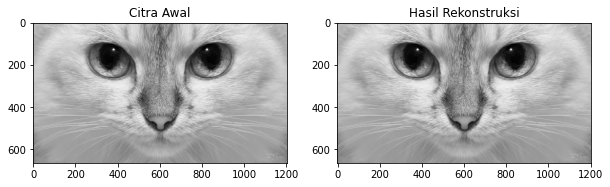

In [23]:
#menampilkan citra hasil rekonstruksi
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

fig.add_subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray') #menampilkan citra awal
plt.title('Citra Awal')
fig.add_subplot(1, 2, 2)
plt.imshow(image_recon, cmap='gray') #menampilkan hasil rekonstruksi
plt.title('Hasil Rekonstruksi')
plt.show(block='true')